In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)
from matplotlib import rcParams
rcParams["figure.figsize"] = 12, 6
sns.set_style('darkgrid')

# Dataframe information

In [96]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [98]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [99]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [100]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


## Removing outliers

In [101]:
# Check for outliers
upper_limit = df['charges'].mean() + 3 * df['charges'].std()
lower_limit = df['charges'].mean() - 3 * df['charges'].std()

df[(df['charges'] > upper_limit) | (df['charges'] < lower_limit)]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [102]:
df = df[(df['charges'] < upper_limit) & (df['charges'] > lower_limit)]
df.charges.describe()

count     1331.000000
mean     13036.775677
std      11699.360324
min       1121.873900
25%       4719.630300
50%       9301.893550
75%      16359.170275
max      49577.662400
Name: charges, dtype: float64

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1331 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1331 non-null   int64  
 1   sex       1331 non-null   object 
 2   bmi       1331 non-null   float64
 3   children  1331 non-null   int64  
 4   smoker    1331 non-null   object 
 5   region    1331 non-null   object 
 6   charges   1331 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.2+ KB


In [104]:
df.isnull().sum() # No null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [105]:
df.duplicated().sum() # 1 duplicate

1

In [106]:
df.drop_duplicates(inplace=True)

# Dataframe manipulation

In [107]:
df['smoker'] = df['smoker'].str.replace('yes', '1')
df['smoker'] = df['smoker'].str.replace('no', '0')
df['smoker'] = df['smoker'].astype(int)

df['smoker'].value_counts()

smoker
0    1063
1     267
Name: count, dtype: int64

In [108]:
df['sex'] = df['sex'].str.replace('male', '1')
df['sex'] = df['sex'].str.replace('fe1', '0') # fe"male", male gets replaced in the previous line
df['sex'] = df['sex'].astype(int)

df['sex'].value_counts()

sex
1    671
0    659
Name: count, dtype: int64

# Plotting data

In [109]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


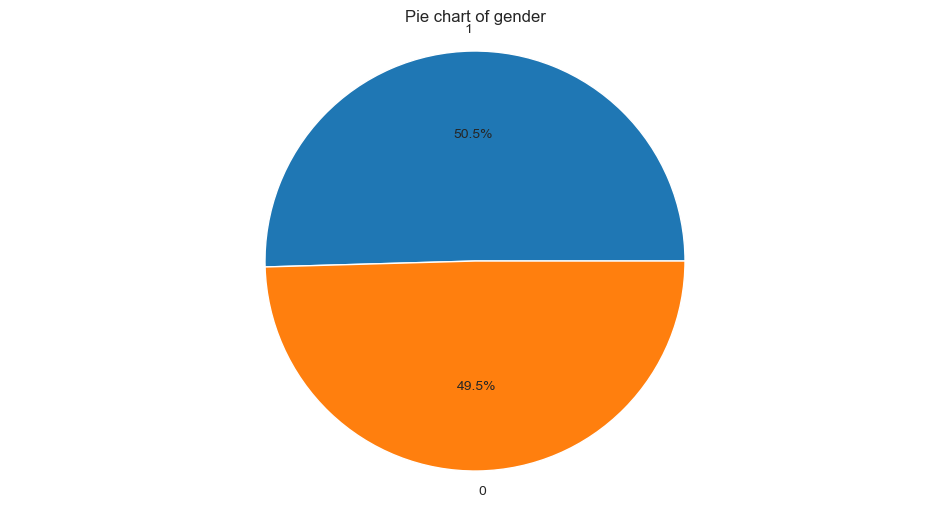

In [110]:
plt.pie(df['sex'].value_counts(), labels=df['sex'].value_counts().index, autopct='%1.1f%%')
plt.title('Pie chart of gender')
plt.axis('equal')

plt.show() #almost equal gender distribution

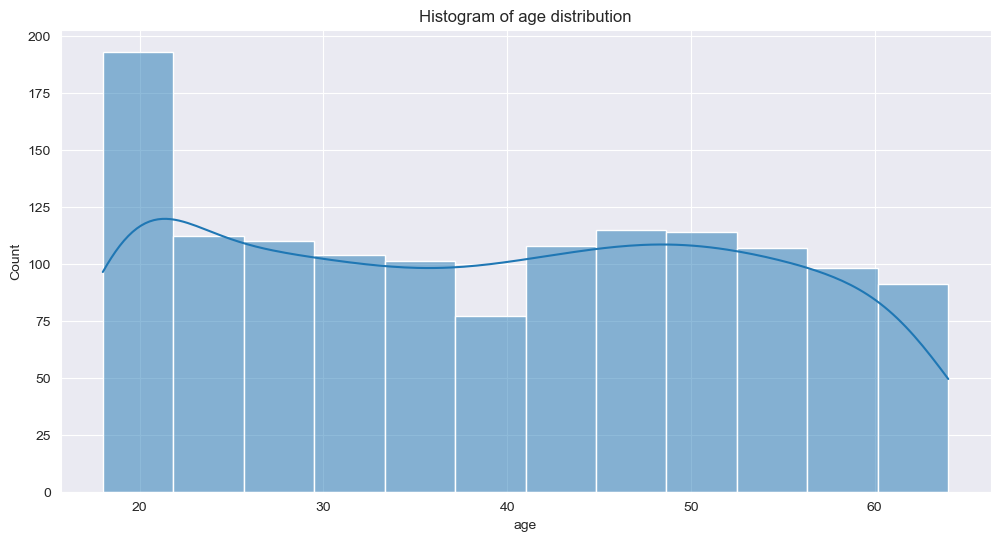

In [111]:
sns.histplot(df['age'], kde=True)
plt.title('Histogram of age distribution')

plt.show() # age distribution is almost uniform

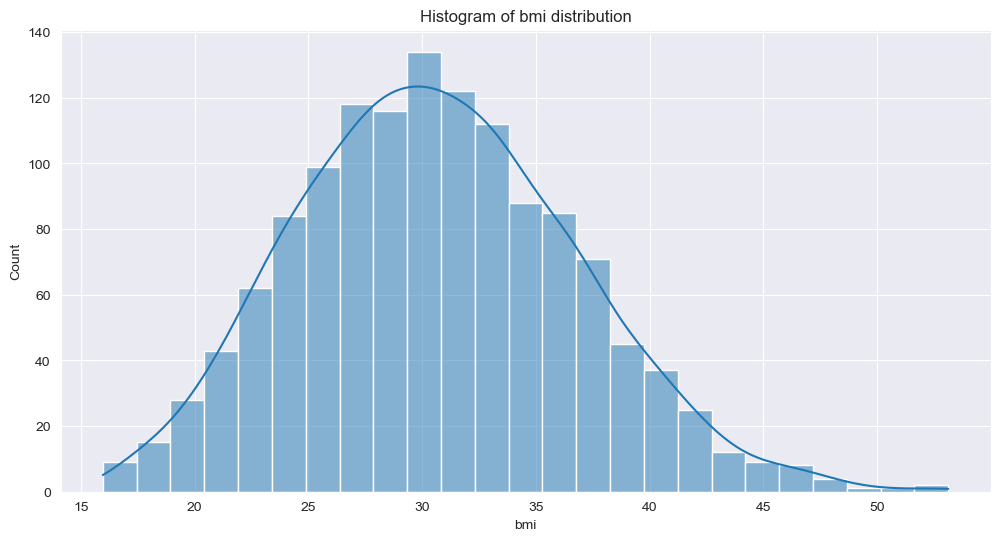

In [112]:
sns.histplot(df['bmi'], kde=True)
plt.title('Histogram of bmi distribution')

plt.show() # bmi distribution is almost normal

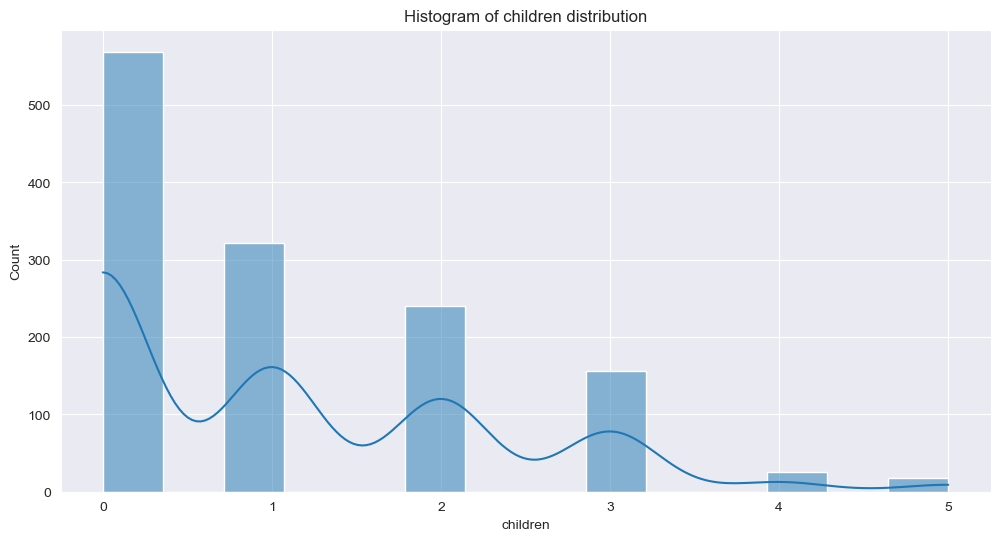

In [113]:
sns.histplot(df['children'], kde=True)
plt.title('Histogram of children distribution')

plt.show() 

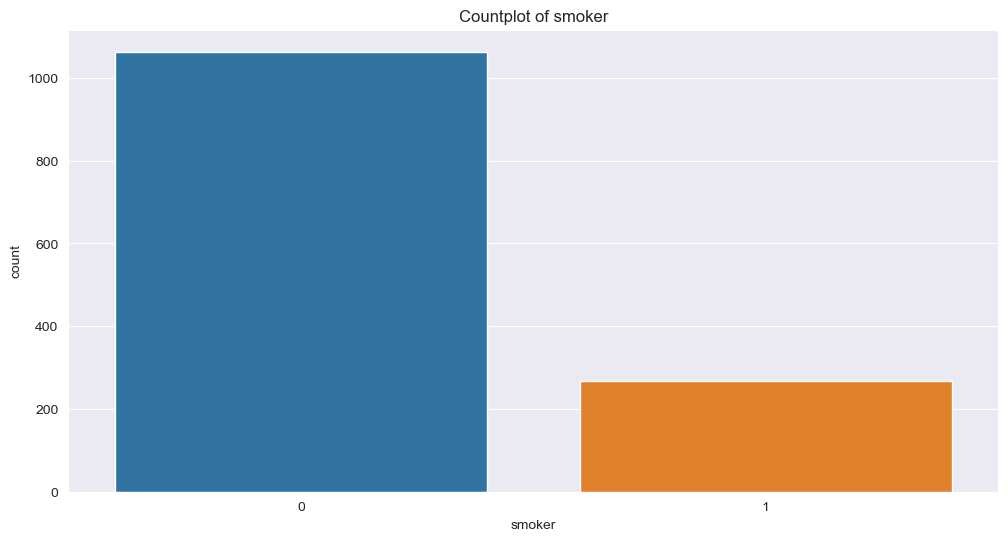

In [114]:
sns.countplot(data=df, x='smoker')
plt.title('Countplot of smoker')

plt.show() # non-smokers are more than smokers

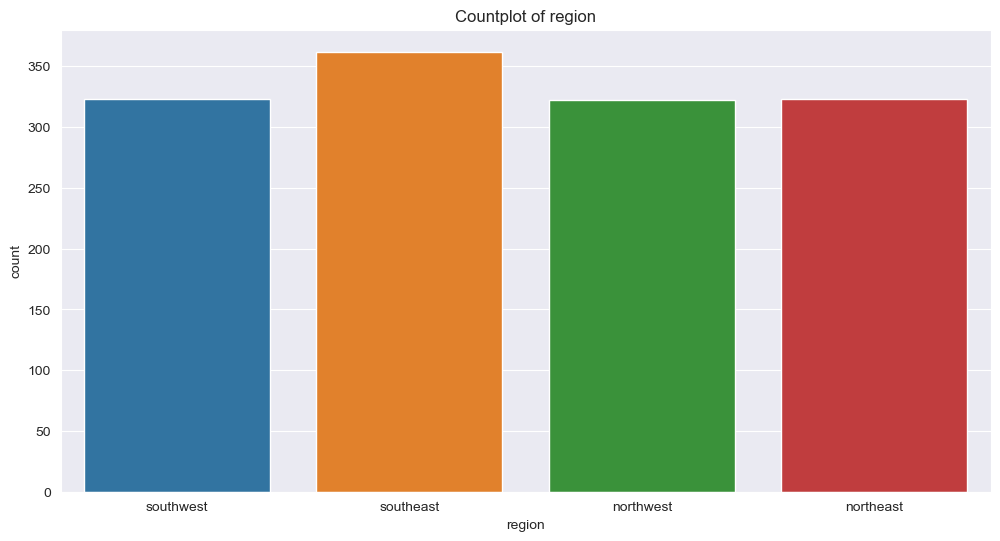

In [115]:
sns.countplot(data=df, x='region')
plt.title('Countplot of region')

plt.show() 

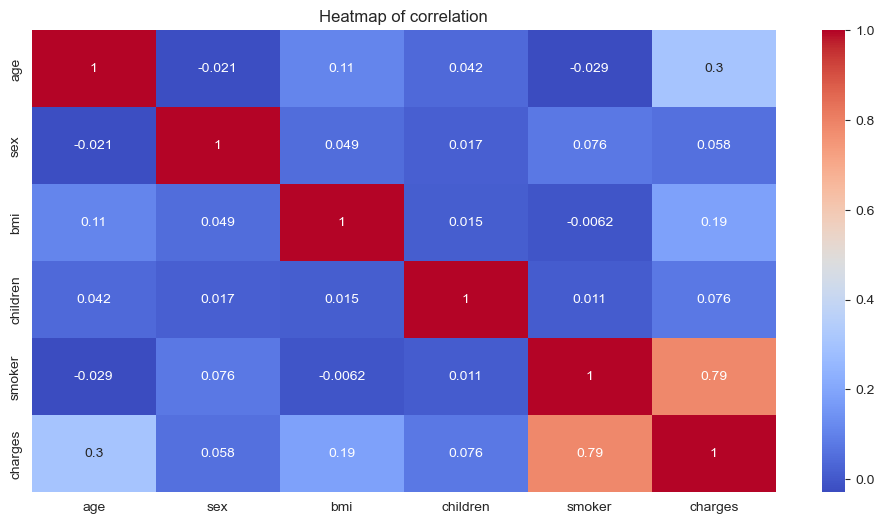

In [116]:
sns.heatmap(df.drop(columns=['region']).corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of correlation')
plt.show() # charges are highly correlated with smoker

# Model Building

## Splitting the Data

In [117]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['region'] = le.fit_transform(df['region']) # 0: northeast, 1: northwest, 2: southeast, 3: southwest
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [118]:
X = df.drop(columns=['charges'])
y = df['charges']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

## Linear Regression Model

In [119]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_y_pred = lr_model.predict(X_test)


from sklearn.metrics import r2_score, mean_squared_error
lr_r2_score = r2_score(y_test, lr_y_pred)
lr_mse_score = mean_squared_error(y_test, lr_y_pred)

print('R2 score:', lr_r2_score)
print('MSE:', lr_mse_score)
print('RMSE:', np.sqrt(lr_mse_score))

R2 score: 0.72675892291558
MSE: 38445032.25861145
RMSE: 6200.405814026324


## Random Forest Regressor Model

In [120]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test)

rf_r2_score = r2_score(y_test, rf_y_pred)
rf_mse_score = mean_squared_error(y_test, rf_y_pred)

print('R2 score:', rf_r2_score)
print('MSE:', rf_mse_score)
print('RMSE:', np.sqrt(rf_mse_score))

R2 score: 0.8324936909821044
MSE: 23568145.472228218
RMSE: 4854.703438133808


## Decision Tree Regressor Model

In [121]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

dt_y_pred = dt_model.predict(X_test)

dt_r2_score = r2_score(y_test, dt_y_pred)
dt_mse_score = mean_squared_error(y_test, dt_y_pred)

print('R2 score:', dt_r2_score)
print('MSE:', dt_mse_score)
print('RMSE:', np.sqrt(dt_mse_score))

R2 score: 0.6372528841190709
MSE: 51038536.081644535
RMSE: 7144.12598444656
